---
title: "HW5"
Bella Williams
date: "2025-09-25"

In [1]:
library(tidyverse)
install.packages("Rtsne")
library(Rtsne)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Question 1

A)

In [2]:
library(readr)
wine <- read_csv("wine.csv")

Rows: 178 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_pheno...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


B)

In [3]:
summary(wine)
colnames(wine)

    Alcohol        Malicacid          Ash        Alcalinity_of_ash
 Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60    
 1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20    
 Median :13.05   Median :1.865   Median :2.360   Median :19.50    
 Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49    
 3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50    
 Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00    
   Magnesium      Total_phenols     Flavanoids    Nonflavanoid_phenols
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300      
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700      
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400      
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619      
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375      
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600      
 Proanthocyanins Color_intensity  

[1] "Alcohol"                      "Malicacid"                   
 [3] "Ash"                          "Alcalinity_of_ash"           
 [5] "Magnesium"                    "Total_phenols"               
 [7] "Flavanoids"                   "Nonflavanoid_phenols"        
 [9] "Proanthocyanins"              "Color_intensity"             
[11] "Hue"                          "0D280_0D315_of_diluted_wines"
[13] "Proline"                      "class"

C)

In [4]:
sapply(wine, class)
wine$class <- as.factor(wine$class)
sapply(wine, class)

sapply(wine[ , sapply(wine, is.numeric)], function(x) {
  c(
    Mean = mean(x),
    SD   = sd(x),
    Var  = var(x),
    Min  = min(x),
    Max  = max(x)
  )
})

Alcohol                    Malicacid 
                   "numeric"                    "numeric" 
                         Ash            Alcalinity_of_ash 
                   "numeric"                    "numeric" 
                   Magnesium                Total_phenols 
                   "numeric"                    "numeric" 
                  Flavanoids         Nonflavanoid_phenols 
                   "numeric"                    "numeric" 
             Proanthocyanins              Color_intensity 
                   "numeric"                    "numeric" 
                         Hue 0D280_0D315_of_diluted_wines 
                   "numeric"                    "numeric" 
                     Proline                        class 
                   "numeric"                    "numeric"

Alcohol                    Malicacid 
                   "numeric"                    "numeric" 
                         Ash            Alcalinity_of_ash 
                   "numeric"                    "numeric" 
                   Magnesium                Total_phenols 
                   "numeric"                    "numeric" 
                  Flavanoids         Nonflavanoid_phenols 
                   "numeric"                    "numeric" 
             Proanthocyanins              Color_intensity 
                   "numeric"                    "numeric" 
                         Hue 0D280_0D315_of_diluted_wines 
                   "numeric"                    "numeric" 
                     Proline                        class 
                   "numeric"                     "factor"

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
Mean,13.0006180,2.336348,2.36651685,19.494944,99.74157,2.2951124,2.0292697,0.36185393,1.5908989,5.058090,0.95744944,2.6116854,746.8933
SD,0.8118265,1.117146,0.27434401,3.339564,14.28248,0.6258510,0.9988587,0.12445334,0.5723589,2.318286,0.22857157,0.7099904,314.9075
Var,0.6590623,1.248015,0.07526464,11.152686,203.98934,0.3916895,0.9977187,0.01548863,0.3275947,5.374449,0.05224496,0.5040864,99166.7174
Min,11.0300000,0.740000,1.36000000,10.600000,70.00000,0.9800000,0.3400000,0.13000000,0.4100000,1.280000,0.48000000,1.2700000,278.0000
Max,14.8300000,5.800000,3.23000000,30.000000,162.00000,3.8800000,5.0800000,0.66000000,3.5800000,13.000000,1.71000000,4.0000000,1680.0000


Question 2

A)

In [5]:
library(dplyr)

wine_scaled <- wine %>%
  mutate(across(
    .cols = where(is.numeric),          
    .fns  = ~ as.numeric(scale(.))      
  ))

head(wine_scaled)
summary(wine_scaled)

Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.5143408,-0.56066822,0.2313998,-1.1663032,1.90852151,0.8067217,1.0319081,-0.6577078,1.2214385,0.2510088,0.3611585,1.8427215,1.01015939,1
0.2455968,-0.49800856,-0.8256672,-2.4838405,0.01809398,0.5670481,0.7315653,-0.8184106,-0.5431887,-0.2924962,0.4049085,1.1103172,0.96252635,1
0.1963252,0.02117152,1.1062139,-0.2679823,0.08810981,0.8067217,1.2121137,-0.4970050,2.1299594,0.2682629,0.3174085,0.7863692,1.39122370,1
1.6867914,-0.34583508,0.4865539,-0.8069748,0.92829983,2.4844372,1.4623994,-0.9791134,1.0292513,1.1827317,-0.4263410,1.1807407,2.32800680,1
0.2948684,0.22705328,1.8352256,0.4506745,1.27837900,0.8067217,0.6614853,0.2261576,0.4002753,-0.3183774,0.3611585,0.4483365,-0.03776747,1
1.4773871,-0.51591132,0.3043010,-1.2860793,0.85828399,1.5576991,1.3622851,-0.1755994,0.6623487,0.7298108,0.4049085,0.3356589,2.23274072,1


    Alcohol           Malicacid            Ash           Alcalinity_of_ash  
 Min.   :-2.42739   Min.   :-1.4290   Min.   :-3.66881   Min.   :-2.663505  
 1st Qu.:-0.78603   1st Qu.:-0.6569   1st Qu.:-0.57051   1st Qu.:-0.687199  
 Median : 0.06083   Median :-0.4219   Median :-0.02375   Median : 0.001514  
 Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.000000  
 3rd Qu.: 0.83378   3rd Qu.: 0.6679   3rd Qu.: 0.69615   3rd Qu.: 0.600395  
 Max.   : 2.25341   Max.   : 3.1004   Max.   : 3.14745   Max.   : 3.145637  
   Magnesium       Total_phenols        Flavanoids      Nonflavanoid_phenols
 Min.   :-2.0824   Min.   :-2.10132   Min.   :-1.6912   Min.   :-1.8630     
 1st Qu.:-0.8221   1st Qu.:-0.88298   1st Qu.:-0.8252   1st Qu.:-0.7381     
 Median :-0.1219   Median : 0.09569   Median : 0.1059   Median :-0.1756     
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000     
 3rd Qu.: 0.5082   3rd Qu.: 0.80672   3rd Qu.: 0.8467   3rd Qu.: 0.6078     

B)

Variables with larger numeric ranges naturally contribute more to variance. The summary statistics showed very different ranges across variables. For example, Proline ranges from 278-1680 while Flavanoids only ranges from 0.34-5.08. Scaling and centering before conducting the principal component analysis (PCA) is helpful because it will prevent variables, like Proline, from dominating the result. As a result, wach variable will contribute equally to the PCA. 

Question 3

A)

In [6]:
wine_pca <- prcomp(wine_scaled %>% select(-class), center = FALSE, scale. = FALSE)

summary(wine_pca)     
wine_pca$rotation   

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


B)
PC1 explains 36.2% of the total variance
PC2 explains 19.21% of the total variance 
Cumulative variance after PC2 is 55.41% 

summary(wine_pca)
gives the standard deviation, proportion of variance, and cumulative proportion for each principal component

C)

We perform PCA before running t-SNE because PCA provides a simple, linear rotation of the data that captures the largest sources of variation in a small number of dimensions. By first using PCA, we align the data along the axes of maximum variation, reduce dimensionality, and filter out noise.

D)

In [7]:
wine_pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630,0.26566365,-0.21353865,-0.05639636,-0.39613926,-0.50861912,-0.21160473,0.22591696,0.26628645,-0.01496997
Malicacid,0.245187580,-0.224930935,0.08901289,0.53689028,-0.03521363,-0.53681385,0.42052391,-0.06582674,0.07528304,0.30907994,-0.07648554,-0.12169604,-0.02596375
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556,0.14302547,-0.15447466,-0.14917061,0.17026002,0.30769445,0.02712539,0.49869142,0.04962237,0.14121803
Alcalinity_of_ash,0.239320405,0.010590502,0.61208035,0.06085941,-0.06610294,0.10082451,-0.28696914,-0.42797018,-0.20044931,-0.05279942,-0.47931378,0.05574287,-0.09168285
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658,-0.72704851,-0.03814394,0.32288330,0.15636143,-0.27140257,-0.06787022,-0.07128891,-0.06222011,-0.05677422
Total_phenols,-0.394660845,-0.065039512,0.14617896,0.19806835,0.14931841,0.08412230,-0.02792498,0.40593409,-0.28603452,0.32013135,-0.30434119,0.30388245,0.46390791
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479,0.10902584,0.01892002,-0.06068521,0.18724536,-0.04957849,0.16315051,0.02569409,0.04289883,-0.83225706
Nonflavanoid_phenols,0.298533103,-0.028779488,0.17036816,-0.20330102,0.50070298,0.25859401,0.59544729,0.23328465,-0.19550132,-0.21553507,-0.11689586,-0.04235219,-0.11403985
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653,-0.13685982,0.53379539,0.37213935,-0.36822675,0.20914487,-0.13418390,0.23736257,0.09555303,0.11691707
Color_intensity,0.088616705,-0.529995672,-0.13730621,0.06592568,0.07643678,0.41864414,-0.22771214,0.03379692,-0.05621752,0.29077518,-0.03183880,-0.60422163,0.01199280


E)

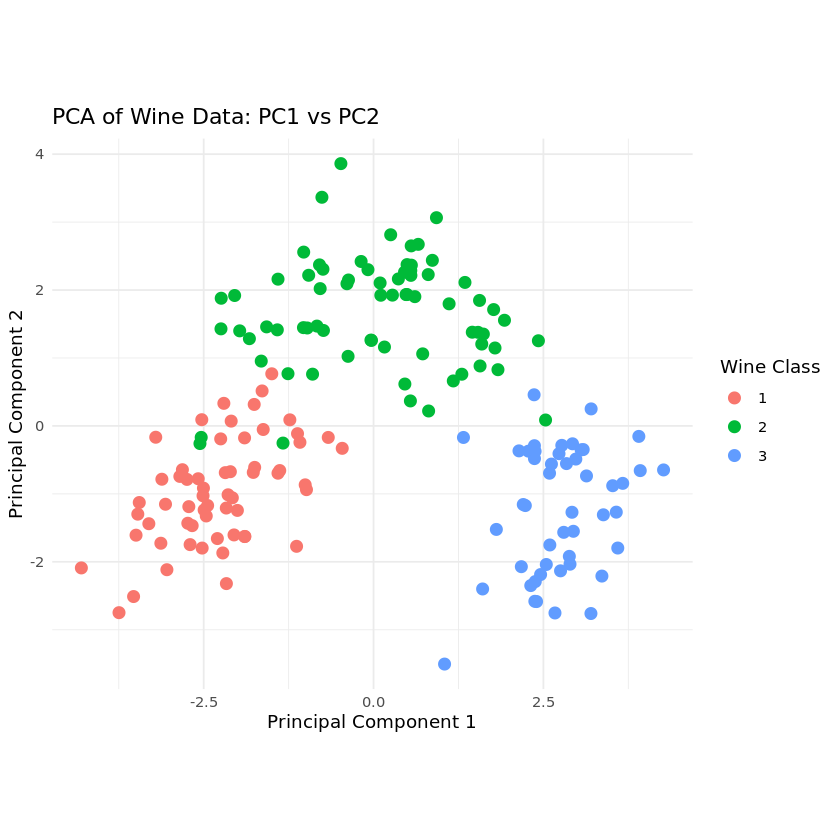

In [8]:
pc_scores <- as_tibble(wine_pca$x) %>%
  select(PC1, PC2) %>%
  mutate(class = wine_scaled$class)

ggplot(pc_scores, aes(x = PC1, y = PC2, color = factor(class))) +
  geom_point(size = 3) +
  labs(title = "PCA of Wine Data: PC1 vs PC2",
       x = "Principal Component 1",
       y = "Principal Component 2",
       color = "Wine Class") +
  theme_minimal() +
  coord_fixed()

F)

The three Wine Classes appear clustered into distinct regions along the PC1 and PC2 axes. Wine Class 1 is around coordinates (-2.5, -2), Wine Class 2 is around coordinates (0.0,2.0), and Wine Class 3 is around coordinates (2.5, -2). Some points from Wine Class 2 overlap with Wine Class 1, indicating that a few wines share similar chemical characteristics.

G)

Data arranged in a circular pattern will fail because all the variation is in the radius, not along the x/y axis.

H)

A vector space is a set of elements where you can add vectors together and the results stay in the set. PCA assumes your data lives in a vector space because it looks for linear rotations and projections along axes of maximum variance. A manifold is a set that locally resembles a vector space, but may have a nonlinear global structure. In this environment, points can be arranged in a circle or spiral. T-SNE is designed for manifolds because it preserves local structure in the data to uncover nonlinear relationships that PCA cannot. 

Question 4

A)

In [9]:
set.seed(123)

wine_pca_subset <- as_tibble(wine_pca$x) %>%
  select(PC1:PC10) %>%
  mutate(class = wine_scaled$class) %>%
  distinct()

X <- wine_pca_subset %>% select(-class) %>% as.matrix()

tsne_out <- Rtsne(
  X, 
  dims = 2, 
  perplexity = 30, 
  verbose = TRUE, 
  check_duplicates = FALSE
)

Performing PCA
Read the 178 x 10 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.01 seconds (sparsity = 0.611413)!
Learning embedding...
Iteration 50: error is 50.396099 (50 iterations in 0.02 seconds)
Iteration 100: error is 51.127538 (50 iterations in 0.03 seconds)
Iteration 150: error is 50.598560 (50 iterations in 0.02 seconds)
Iteration 200: error is 50.140847 (50 iterations in 0.01 seconds)
Iteration 250: error is 50.024571 (50 iterations in 0.01 seconds)
Iteration 300: error is 0.632583 (50 iterations in 0.01 seconds)
Iteration 350: error is 0.376300 (50 iterations in 0.01 seconds)
Iteration 400: error is 0.367101 (50 iterations in 0.01 seconds)
Iteration 450: error is 0.366323 (50 iterations in 0.01 seconds)
Iteration 500: error is 0.364658 (50 iterations in 0.01 seconds)
Iteration 550: error is 0.369730 (50 iterations in 0.01 seconds)
Iteration 600

B)

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”


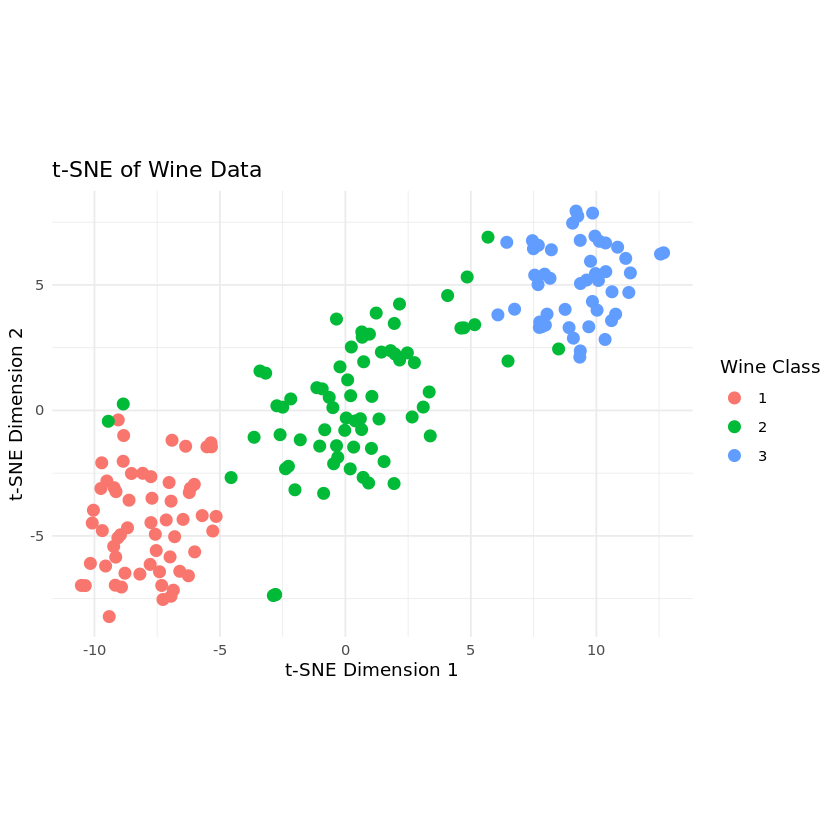

In [10]:
tsne_results <- as_tibble(tsne_out$Y) %>%
  rename(TSNE1 = V1, TSNE2 = V2) %>%
  mutate(class = wine_scaled$class)

ggplot(tsne_results, aes(x = TSNE1, y = TSNE2, color = factor(class))) +
  geom_point(size = 3) +
  labs(title = "t-SNE of Wine Data",
       x = "t-SNE Dimension 1",
       y = "t-SNE Dimension 2",
       color = "Wine Class") +
  theme_minimal() +
  coord_fixed()

C) 

PCA reduces dimensionality and can be reused for new data, but it cannot capture nonlinear patterns, so a useful rule of thumb is to use t-SNE for visualization and PCA for preprocessing or dimensionality reduction.

D)

This workflow works well for high-dimensional, structured data where features are correlated or redundant, such as gene expression, chemical profiles, or image pixels. It is also useful when the data lies on a nonlinear manifold, allowing t-SNE to reveal clusters or patterns that PCA alone might not capture.